In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")



In [ ]:
# Read csv file into a pandas dataframe
df = pd.read_csv("data_1.csv", encoding= 'unicode_escape')

In [ ]:
df2 = pd.read_csv("data_1.csv", encoding= 'unicode_escape')

In [ ]:
df.head(5)

,Q1,Q2,Q3,Q8,Q9,Q10,Q11,Q11a,Q11b,Q12,...,Q24,Q25,Q26,Q26a,Q27,Q27a,Q28,Q28a,Q29,Q29a
0,44,Female,Michigan,Yes,1,Yes,Not applicable,0,not applicable,8,...,0-.5 hour,Yes,Yes,I am exercising/moving less,Yes,I am eating more healthy foods,Yes,I am eating more food each day,Yes,Slightly worse
1,39,Female,Michigan,Yes,2,Yes,Yes,2,Under 12 years old,7,...,0.51 â 1 hour,No,No,I am exercising/moving less,Yes,I am eating more healthy foods,Yes,I am eating less food each day,Yes,Moderately worse
2,28,Female,Michigan,Yes,2,Yes,Yes,1,Under 12 years old,7,...,1-2 hours,Yes,Yes,I am exercising/moving more,No,I am eating less healthy foods,Yes,I am eating more food each day,Yes,Moderately worse
3,29,Female,Michigan,Yes,2,No,Not applicable,0,not applicable,7,...,1-2 hours,Yes,Yes,I am exercising/moving more,Yes,I am eating less healthy foods,Yes,I am eating more food each day,No,Slightly worse
4,32,Female,Michigan,Yes,2,No,Yes,2,Under 12 years old,7,...,1-2 hours,Yes,No,I am exercising/moving less,Yes,I am eating less healthy foods,Yes,I am eating more food each day,Yes,Moderately worse


In [ ]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12',
       'Q13', 'Q14', 'Q14a', 'Q15', 'Q15a', 'Q16', 'Q16a', 'Q16b', 'Q17',
       'Q18', 'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q26a', 'Q27', 'Q27a', 'Q28', 'Q28a', 'Q29', 'Q29a'],
      dtype='object')

In [ ]:
df['Q1'].unique()

array([44, 39, 28, 29, 32, 43, 59, 25, 42, 22, 41, 58, 35, 30, 38, 21, 33,
       67, 24, 45, 27, 49, 48, 57, 53, 47, 34, 36, 52, 55, 66, 68, 26, 37,
       69, 31, 40, 75, 62, 23, 20, 50, 60, 61, 46, 51, 81, 71, 63, 72, 54,
       64, 56, 65])

In [ ]:
df['Q2'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [ ]:
Q2_mapping = {'Female':1, 'Male':2, 'Prefer not to say': 0}
df['Q2'] = df['Q2'].map(Q2_mapping)
df['Q2']

0      1
1      1
2      1
3      1
4      1
      ..
257    1
258    2
259    1
260    1
261    1
Name: Q2, Length: 262, dtype: int64

In [ ]:
df['Q2'].unique()

array([1, 2, 0])

In [ ]:
df['Q3'].unique()

array(['Michigan', 'Georgia', 'New York', 'Illinois', 'West Virginia',
       'Utah', 'Pennsylvania', 'Maryland', 'Ohio',
       'I do not reside in the United States', 'Minnesota', 'Colorado',
       'Connecticut', 'Louisiana', 'Missouri', 'Florida', 'Puerto Rico',
       'Indiana', 'California', 'Washington', 'Kansas', 'Alabama',
       'Massachusetts', 'North Carolina', 'Texas', 'South Carolina',
       'Oregon'], dtype=object)

In [ ]:
Q3_mapping={'Michigan':1, 'Iowa':2, 'Missouri':3,
       'Ohio':4, 'Georgia':5, 'Mississippi':6, 'New York':7, 'West Virginia':8,
       'Colorado':9, 'Virginia':10, 'Illinois':11, 'Oregon':12, 'Arizona':13, 'Utah':14,
       'Pennsylvania':15, 'Florida':16, 'Kansas':17, 'Idaho':18, 'California':19,
       'I do not reside in the United States':20, 'Minnesota':21, 'Oklahoma':22,
       'Louisiana':23, 'Texas':24, 'Puerto Rico':25, 'Washington':26, 'Nebraska':27,
       'Kentucky':28, 'Massachusetts':29, 'Tennessee':30, 'Indiana':31, 'Alabama':32,
       'Maryland':33, 'Wisconsin':34, 'North Carolina':35, 'New Jersey':36,
       'New Mexico':37, 'Vermont':38, 'South Carolina':39, 'Arkansas':40,
       'Connecticut':41 }
df['Q3']= df['Q3'].map(Q3_mapping)
df['Q3']

0       1
1       1
2       1
3       1
4       1
       ..
257     5
258     1
259    19
260     1
261     1
Name: Q3, Length: 262, dtype: int64

In [ ]:
df['Q3'].unique()

array([ 1,  5,  7, 11,  8, 14, 15, 33,  4, 20, 21,  9, 41, 23,  3, 16, 25,
       31, 19, 26, 17, 32, 29, 35, 24, 39, 12])

In [ ]:
df['Q8'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
labels = df['Q8'].astype('category').cat.categories.tolist()
Q8_mapping = {'Q8' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(Q8_mapping)
df.replace(Q8_mapping, inplace=True)
df['Q8'].unique()

{'Q8': {'No': 1, 'Yes': 2}}


array([2, 1])

In [ ]:
df['Q9'].unique()

array(['1', '2', 'Yes', 'Not applicable', 'No', 'No,Not applicable'],
      dtype=object)

In [ ]:
Q9_mapping={'1':2, '2':2, 'Yes':2, 'Not applicable':1, 'No':1, 'No,Not applicable':1}
df['Q9']= df['Q9'].map(Q9_mapping)
df['Q9']

0      2
1      2
2      2
3      2
4      2
      ..
257    1
258    2
259    2
260    1
261    1
Name: Q9, Length: 262, dtype: int64

In [ ]:
df['Q9'].unique()

array([2, 1])

In [ ]:
df['Q10'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
labels = df['Q10'].astype('category').cat.categories.tolist()
Q10_mapping = {'Q10' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(Q10_mapping)
df.replace(Q10_mapping, inplace=True)
df['Q10'].unique()

{'Q10': {'No': 1, 'Yes': 2}}


array([2, 1])

In [ ]:
df['Q11'].unique()

array(['Not applicable', 'Yes', 'No'], dtype=object)

In [ ]:
Q11_mapping={'Not applicable':1, 'Yes':2, 'No':1 }
df['Q11']= df['Q11'].map(Q11_mapping)
df['Q11']

0      1
1      2
2      2
3      1
4      2
      ..
257    1
258    2
259    2
260    1
261    1
Name: Q11, Length: 262, dtype: int64

In [ ]:
df['Q14'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q14_mapping={'Yes':2, 'No':1 }
df['Q14']= df['Q14'].map(Q14_mapping)
df['Q14']

0      2
1      2
2      1
3      1
4      1
      ..
257    1
258    2
259    2
260    2
261    1
Name: Q14, Length: 262, dtype: int64

In [ ]:
df['Q15'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q15_mapping={'Yes':2, 'No':1 }
df['Q15']= df['Q15'].map(Q15_mapping)
df['Q15']

0      2
1      1
2      2
3      1
4      2
      ..
257    1
258    2
259    2
260    2
261    2
Name: Q15, Length: 262, dtype: int64

In [ ]:
df['Q16'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q16_mapping={'Yes':2, 'No':1 }
df['Q16']= df['Q16'].map(Q16_mapping)
df['Q16']

0      2
1      2
2      1
3      2
4      1
      ..
257    2
258    1
259    2
260    2
261    1
Name: Q16, Length: 262, dtype: int64

In [ ]:
df['Q17'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
Q17_mapping={'Yes':2, 'No':1 }
df['Q17']= df['Q17'].map(Q17_mapping)
df['Q17']

0      1
1      1
2      1
3      2
4      1
      ..
257    1
258    1
259    2
260    1
261    1
Name: Q17, Length: 262, dtype: int64

In [ ]:
df['Q18'].unique()

array(['Yes'], dtype=object)

In [ ]:
Q18_mapping={'Yes':2, 'No':1 }
df['Q18']= df['Q18'].map(Q18_mapping)
df['Q18']

0      2
1      2
2      2
3      2
4      2
      ..
257    2
258    2
259    2
260    2
261    2
Name: Q18, Length: 262, dtype: int64

In [ ]:
df['Q18a'].unique()

array([1, 0])

In [ ]:
df['Q23'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
Q23_mapping={'Yes':2, 'No':1 }
df['Q23']= df['Q23'].map(Q23_mapping)
df['Q23']

0      1
1      2
2      2
3      2
4      2
      ..
257    2
258    1
259    2
260    2
261    2
Name: Q23, Length: 262, dtype: int64

In [ ]:
df['Q25'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q25_mapping={'Yes':2, 'No':1 }
df['Q25']= df['Q25'].map(Q25_mapping)
df['Q25']

0      2
1      1
2      2
3      2
4      2
      ..
257    2
258    1
259    2
260    2
261    1
Name: Q25, Length: 262, dtype: int64

In [ ]:
df['Q26'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q26_mapping={'Yes':2, 'No':1 }
df['Q26']= df['Q26'].map(Q26_mapping)
df['Q26']

0      2
1      1
2      2
3      2
4      1
      ..
257    2
258    2
259    2
260    2
261    2
Name: Q26, Length: 262, dtype: int64

In [ ]:
df['Q27'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q27_mapping={'Yes':2, 'No':1 }
df['Q27']= df['Q27'].map(Q27_mapping)
df['Q27']

0      2
1      2
2      1
3      2
4      2
      ..
257    2
258    1
259    2
260    2
261    2
Name: Q27, Length: 262, dtype: int64

In [ ]:
df['Q28'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q28_mapping={'Yes':2, 'No':1 }
df['Q28']= df['Q28'].map(Q28_mapping)
df['Q28']

0      2
1      2
2      2
3      2
4      2
      ..
257    2
258    2
259    2
260    2
261    1
Name: Q28, Length: 262, dtype: int64

In [ ]:
df['Q29'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Q29_mapping={'Yes':2, 'No':1 }
df['Q29']= df['Q29'].map(Q29_mapping)
df['Q29']

0      2
1      2
2      2
3      1
4      2
      ..
257    2
258    1
259    2
260    2
261    2
Name: Q29, Length: 262, dtype: int64

In [ ]:
df['Q12'].unique()

array(['8', '7', '7.75', '7:15', '5-6', '10', '1.5', '9', '6', '7-8',
       '6-7', 'seven', '7.5', '6.5', '5', '8.5', '8-10', '8-9', '5.7',
       '7-9', '4', '7 hours', '7-7.5', '7.30', '6-8'], dtype=object)

In [ ]:
Q12_mapping={'8':8, '6':6, '7':7, '7.75':8, '7:15':7, '5-6':6, '10':10, '1.5':2, '9':9, '7-8':8,
       '6-7':7, '7.5':8, 'seven':7, '6.5':7, '5':5, '8.5':9, '8-10':10, '8-9':9,
       '5.7':6, '7-9':9, '4':4, '7 hours':7, '7-7.5':7, '7.30':7, '6-8':8}
df['Q12']= df['Q12'].map(Q12_mapping)
df['Q12']

0      8
1      7
2      7
3      7
4      7
      ..
257    8
258    7
259    6
260    9
261    8
Name: Q12, Length: 262, dtype: int64

In [ ]:
df['Q12'].unique()

array([ 8,  7,  6, 10,  2,  9,  5,  4])

In [ ]:
df['Q13'].unique()

array(['9', '7', '6', '8', '7:30', '7.5', '5-6', '4-5', '4', '6.5', '5',
       '10', '4.5', 'seven', '6-7', '5-8', 'Na', '8.5', '9.5', '5-10',
       '6 (but much more variability)', '6 to 7', '7-8', '5.5', '6-8',
       '8-10', '4.3', '7.45', '3', '7-7.5', '9-10'], dtype=object)

In [ ]:
Q13_mapping={'9':9, '5.5':5, '7':7, '6':6, '8':8, '7:30':8, '7.5':8, '5-6':6, '8 ':8, '4-5':5, '4':4,
       '6.5':7, '5':5, '4.5':5, 'seven':7, '6-7':7, '5-8':8, '10':10, 'Na':6, '8.5':9,
       '9.5':9, '5-10':10, '6 (but much more variability)':6, '6 to 7':6,
       '7-8':8, '6-8':8, '8-10':10, '4.3':5, '7.45':8, '3':3, '7-7.5':7, '9-10':10 }
df['Q13']= df['Q13'].map(Q13_mapping)
df['Q13']

0       9
1       7
2       7
3       6
4       7
       ..
257     8
258     8
259     7
260    10
261     8
Name: Q13, Length: 262, dtype: int64

In [ ]:
df['Q13'].unique()

array([ 9,  7,  6,  8,  5,  4, 10,  3])

In [ ]:
df['Q19'].unique()


array(['2-3 times a week', 'Once a month or less', 'Never',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q19_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df['Q19']= df['Q19'].map(Q19_mapping)
df['Q19']

0      3
1      3
2      2
3      2
4      3
      ..
257    2
258    3
259    4
260    4
261    3
Name: Q19, Length: 262, dtype: int64

In [ ]:
df['Q19'].unique()

array([3, 2, 1, 4, 5])

In [ ]:
df['Q20'].unique()

array(['4 or more times a week', '2-4 times a month', '2-3 times a week',
       'Never', 'Once a month or less'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q20_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df['Q20']= df['Q20'].map(Q20_mapping)
df['Q20']

0      5
1      5
2      4
3      5
4      5
      ..
257    4
258    3
259    3
260    3
261    3
Name: Q20, Length: 262, dtype: int64

In [ ]:
df['Q20'].unique()

array([5, 4, 3, 1, 2])

In [ ]:
df['Q21'].unique()

array(['Never', '2-3 times a week', 'Once a month or less',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q21_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df['Q21']= df['Q21'].map(Q21_mapping)
df['Q21']

0      1
1      1
2      1
3      1
4      1
      ..
257    1
258    1
259    1
260    1
261    1
Name: Q21, Length: 262, dtype: int64

In [ ]:
df['Q21'].unique()

array([1, 3, 2, 4, 5])

In [ ]:
df['Q22'].unique()

array(['Never', '2-3 times a week', 'Once a month or less',
       '2-4 times a month', '4 or more times a week'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q22_mapping={'4 or more times a week':5, '2-4 times a month':4,  '2-3 times a week':3,  'Once a month or less':2, 'Never':1  }
df['Q22']= df['Q22'].map(Q22_mapping)
df['Q22']

0      1
1      1
2      1
3      1
4      1
      ..
257    1
258    1
259    1
260    1
261    4
Name: Q22, Length: 262, dtype: int64

In [ ]:
df['Q22'].unique()

array([1, 3, 2, 4, 5])

In [ ]:
df['Q24'].unique()

array(['0-.5 hour', '0.51 â\x80\x93 1 hour', '1-2 hours', '2-3 hours',
       '3+ hours'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q24_mapping={'0-.5 hour':1, '1-2 hours':2, '0.51 â\x80\x93 1 hour':3, '2-3 hours':4, '3+ hours':5 }
df['Q24']= df['Q24'].map(Q24_mapping)
df['Q24']

0      1
1      3
2      2
3      2
4      2
      ..
257    4
258    1
259    5
260    4
261    2
Name: Q24, Length: 262, dtype: int64

In [ ]:
df['Q24'].unique()

array([1, 3, 2, 4, 5])

In [ ]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12',
       'Q13', 'Q14', 'Q14a', 'Q15', 'Q15a', 'Q16', 'Q16a', 'Q16b', 'Q17',
       'Q18', 'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q26a', 'Q27', 'Q27a', 'Q28', 'Q28a', 'Q29', 'Q29a'],
      dtype='object')

In [ ]:
df['Q29a'].unique()

array(['Slightly worse', 'Moderately worse', 'Slightly better',
       'Much worse', 'Slightly better,About the same,Slightly worse',
       'Slightly worse,Moderately worse', 'About the same',
       'Moderately better', 'Much better',
       'About the same,Slightly worse',
       'Moderately better,Slightly better'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q29a_mapping={'Slightly worse':0, 
             'Moderately worse':1, 
             'Slightly better':0, 
             'Much worse':2, 
             'Slightly worse,Moderately worse':1 ,
             'About the same':0,
             'Slightly better,About the same,Slightly worse': 0, 
             'Moderately better':3,
             'Much better': 4,
             'About the same,Slightly worse': 0, 
             'Moderately better,Slightly better': 3   }
df['Q29a']= df['Q29a'].map(Q29a_mapping)
df['Q29a']

0      0
1      1
2      1
3      0
4      1
      ..
257    1
258    0
259    1
260    4
261    1
Name: Q29a, Length: 262, dtype: int64

In [ ]:
np.unique(df["Q29a"])

array([0, 1, 2, 3, 4])

In [ ]:
df["Q11b"].unique()

array(['not applicable', 'Under 12 years old', '12-17 years old',
       'Under 12 years old,12-17 years old', '18-24 years old',
       '12-17 years old,18-24 years old',
       'Under 12 years old,18-24 years old',
       'Under 12 years old,12-17 years old,18-24 years old'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q11b_mapping={'not applicable':0, 
             'Under 12 years old':1, 
             '12-17 years old':2, 
             'Under 12 years old,12-17 years old':3,
             '18-24 years old':4 ,
             '12-17 years old,18-24 years old':5,
             'Under 12 years old,18-24 years old': 6, 
             'Under 12 years old,12-17 years old,18-24 years old': 7 }
df['Q11b']= df['Q11b'].map(Q11b_mapping)
df['Q11b']

0      0
1      1
2      1
3      0
4      1
      ..
257    0
258    3
259    2
260    0
261    0
Name: Q11b, Length: 262, dtype: int64

In [ ]:
df["Q11b"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
df["Q14a"].unique()

array(['I am working more hours', 'I am working the same hours',
       'I am working fewer hours'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q14a_mapping={'I am working more hours':1, 
             'I am working the same hours':0, 
             'I am working fewer hours':2, 
              }
df['Q14a']= df['Q14a'].map(Q14a_mapping)
df['Q14a']

0      1
1      1
2      0
3      0
4      0
      ..
257    0
258    2
259    2
260    2
261    0
Name: Q14a, Length: 262, dtype: int64

In [ ]:
df["Q14a"].unique()

array([1, 0, 2])

In [ ]:
df["Q16a"].unique()

array(['I am going to bed later', 'My bedtime has not changed',
       'I am going to bed earlier'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q16a_mapping={'I am going to bed later':1, 
             'My bedtime has not changed':0, 
             'I am going to bed earlier':2, 
              }
df['Q16a']= df['Q16a'].map(Q16a_mapping)
df['Q16a']

0      1
1      1
2      1
3      1
4      1
      ..
257    1
258    1
259    1
260    2
261    1
Name: Q16a, Length: 262, dtype: int64

In [ ]:
df["Q16a"].unique()

array([1, 0, 2])

In [ ]:
df["Q16b"].unique()

array(['I am waking up later', 'I waking up earlier',
       'My waketime has not changed'], dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q16b_mapping={'I am waking up later':1, 
             'My waketime has not changed':0, 
             'I waking up earlier':2, 
              }
df['Q16b']= df['Q16b'].map(Q16b_mapping)
df['Q16b']

0      1
1      1
2      1
3      1
4      1
      ..
257    2
258    1
259    1
260    1
261    1
Name: Q16b, Length: 262, dtype: int64

In [ ]:
df["Q26a"].unique()

array(['I am exercising/moving less', 'I am exercising/moving more'],
      dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q26a_mapping={'I am exercising/moving less':1, 
             'I am exercising/moving more':0, 
          
              }
df['Q26a']= df['Q26a'].map(Q26a_mapping)
df['Q26a']

0      1
1      1
2      0
3      0
4      1
      ..
257    1
258    0
259    1
260    0
261    1
Name: Q26a, Length: 262, dtype: int64

In [ ]:
df["Q27a"].unique()

array(['I am eating more healthy foods', 'I am eating less healthy foods'],
      dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q27a_mapping={'I am eating more healthy foods':1, 
             'I am eating less healthy foods':0, 
          
              }
df['Q27a']= df['Q27a'].map(Q27a_mapping)
df['Q27a']

0      1
1      1
2      0
3      0
4      0
      ..
257    0
258    0
259    0
260    1
261    0
Name: Q27a, Length: 262, dtype: int64

In [ ]:
df["Q28a"].unique()

array(['I am eating more food each day', 'I am eating less food each day'],
      dtype=object)

In [ ]:
# Converting the Ordinal Categorical features into integers
Q28a_mapping={'I am eating more food each day':1, 
             'I am eating less food each day':0, 
          
              }
df['Q28a']= df['Q28a'].map(Q28a_mapping)
df['Q28a']

0      1
1      0
2      1
3      1
4      1
      ..
257    1
258    1
259    1
260    1
261    1
Name: Q28a, Length: 262, dtype: int64

In [ ]:
df.drop(columns=['Q15a'])

,Q1,Q2,Q3,Q8,Q9,Q10,Q11,Q11a,Q11b,Q12,...,Q24,Q25,Q26,Q26a,Q27,Q27a,Q28,Q28a,Q29,Q29a
0,44,1,1,2,2,2,1,0,0,8,...,1,2,2,1,2,1,2,1,2,0
1,39,1,1,2,2,2,2,2,1,7,...,3,1,1,1,2,1,2,0,2,1
2,28,1,1,2,2,2,2,1,1,7,...,2,2,2,0,1,0,2,1,2,1
3,29,1,1,2,2,1,1,0,0,7,...,2,2,2,0,2,0,2,1,1,0
4,32,1,1,2,2,1,2,2,1,7,...,2,2,1,1,2,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,29,1,5,2,1,2,1,0,0,8,...,4,2,2,1,2,0,2,1,2,1
258,44,2,1,2,2,1,2,2,3,7,...,1,1,2,0,1,0,2,1,1,0
259,47,1,19,2,2,1,2,2,2,6,...,5,2,2,1,2,0,2,1,2,1
260,58,1,1,1,1,1,1,0,0,9,...,4,2,2,0,2,1,2,1,2,4


In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

In [ ]:
data = df

In [ ]:
data = data.drop([ "Q15a","Q3"], axis = 1)

In [ ]:
data.columns

Index(['Q1', 'Q2', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29', 'Q29a'],
      dtype='object')

In [ ]:
data.shape

(262, 34)

In [ ]:
# split into input (X) and output (y) variables
X = data.loc[:,data.columns !='Q18a'].astype(str)
y = data['Q18a'].astype(str)
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize
print('Input', X.shape)
print('Output', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_tr=X_train
y_tr=y_train

Input (262, 161)
Output (262,)


In [ ]:
LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_tr, y_tr)
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.8046

In [ ]:
LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_tr, y_tr)
LR.predict(X_test)
round(LR.score(X_tr,y_tr), 4)

1.0

In [ ]:
pred_LR = LR.predict(X_test)
f1_score(y_test, pred_LR, pos_label='positive', average = 'micro')

0.8045977011494253

In [ ]:
SVM = svm.SVC().fit(X_tr, y_tr)
SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)

0.7931

In [ ]:
SVM = svm.SVC().fit(X_tr, y_tr)
SVM.predict(X_test)
round(SVM.score(X_tr,y_tr), 4)

0.8914

In [ ]:
pred_SVM = SVM.predict(X_test)
f1_score(y_test, pred_SVM, pos_label='positive', average = 'micro')

0.7931034482758621

In [ ]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 12), random_state=1).fit(X_tr, y_tr)
NN.predict(X_test)
round(NN.score(X_test, y_test), 4)

0.7816

In [ ]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 12), random_state=1).fit(X_tr, y_tr)
NN.predict(X_test)
round(NN.score(X_tr,y_tr), 4)

1.0

In [ ]:
pred_NN = NN.predict(X_test)
f1_score(y_test, pred_NN, pos_label='positive', average = 'micro')

0.781609195402299

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []

KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_tr, y_tr)
KNN.predict(X_test)
KNN.score(X_test,y_test)

0.7931034482758621

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []

KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_tr, y_tr)
KNN.predict(X_test)
round(KNN.score(X_tr,y_tr), 4)

0.9143

In [ ]:
pred_KNN = KNN.predict(X_test)
f1_score(y_test, pred_KNN, pos_label='positive', average = 'micro')

0.7931034482758621

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_tr, y_tr)
clf.predict(X_test)
round(clf.score(X_test,y_test), 4)

0.954

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_tr, y_tr)
clf.predict(X_test)
round(clf.score(X_tr,y_tr), 4)

0.9714

In [ ]:
pred_DT = clf.predict(X_test)
f1_score(y_test, pred_DT, pos_label='positive', average = 'micro')

0.9540229885057472

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = [("LogisticRegression", LR),("SVM", SVM)]
ensemble1 = VotingClassifier(estimators, voting ='hard')
ensemble1.fit(X_tr, y_tr)
round(ensemble1.score(X_tr,y_tr), 4)

1.0

In [ ]:
pred_ensemble1 = ensemble1.predict(X_test)
f1_score(y_test, pred_ensemble1, pos_label='positive', average = 'micro')

0.8045977011494253

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = [("LogisticRegression", LR),("SVM", SVM), ("NN", NN)]
ensemble2 = VotingClassifier(estimators, voting ='hard')
ensemble2.fit(X_tr, y_tr)
round(ensemble2.score(X_tr,y_tr), 4)

1.0

In [ ]:
pred_ensemble2 = ensemble2.predict(X_test)
f1_score(y_test, pred_ensemble2, pos_label='positive', average = 'micro')

0.8045977011494253

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = [("LogisticRegression", LR),("SVM", SVM), ("NN", NN), ("KNN", KNN)]
ensemble3 = VotingClassifier(estimators, voting ='hard')
ensemble3.fit(X_tr, y_tr)
round(ensemble3.score(X_tr,y_tr), 4)

1.0

In [ ]:
pred_ensemble3 = ensemble3.predict(X_test)
f1_score(y_test, pred_ensemble3, pos_label='positive', average = 'micro')

0.8045977011494253

In [ ]:
# Ensemble using LR, SVM, NN, KNN, DT
estimators = [("LogisticRegression", LR),("SVM", SVM), ("NN", NN), ("KNN", KNN), ("DT", clf)]
ensemble_all = VotingClassifier(estimators, voting ='hard')
ensemble_all.fit(X_tr, y_tr)
round(ensemble_all.score(X_tr,y_tr), 4)

0.9886

In [140]:
ensemble_all.fit(X_test, y_test)
round(ensemble_all.score(X_test, y_test), 4)

0.9329

In [ ]:
pred_ensemble_all = ensemble_all.predict(X_test)
f1_score(y_test, pred_ensemble_all, pos_label='positive', average = 'micro')

0.8160919540229885

In [ ]:
from google.colab import files
data.to_csv('data_2.csv') 
files.download('data_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(data)
print(data.shape)

     Q1  Q2  Q8  Q9  Q10  Q11  Q11a  Q11b  Q12  Q13  ...  Q24  Q25  Q26  Q26a  \
0    44   1   2   2    2    1     0     0    8    9  ...    1    2    2     1   
1    39   1   2   2    2    2     2     1    7    7  ...    3    1    1     1   
2    28   1   2   2    2    2     1     1    7    7  ...    2    2    2     0   
3    29   1   2   2    1    1     0     0    7    6  ...    2    2    2     0   
4    32   1   2   2    1    2     2     1    7    7  ...    2    2    1     1   
..   ..  ..  ..  ..  ...  ...   ...   ...  ...  ...  ...  ...  ...  ...   ...   
257  29   1   2   1    2    1     0     0    8    8  ...    4    2    2     1   
258  44   2   2   2    1    2     2     3    7    8  ...    1    1    2     0   
259  47   1   2   2    1    2     2     2    6    7  ...    5    2    2     1   
260  58   1   1   1    1    1     0     0    9   10  ...    4    2    2     0   
261  66   1   1   1    1    1     0     0    8    8  ...    2    1    2     1   

     Q27  Q27a  Q28  Q28a  

In [ ]:
print(data.columns)

Index(['Q1', 'Q2', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29', 'Q29a'],
      dtype='object')


Accuracy: 0.911 (0.014) 

Accuracy: 0.934 (0.018) 

Accuracy: 0.936 (0.023) 

Accuracy: 0.940 (0.023) 

Accuracy: 0.942 (0.027) 

Accuracy: 0.945 (0.029) 

Accuracy: 0.950 (0.029) 

Accuracy: 0.952 (0.031) 

Accuracy: 0.945 (0.039) 

Accuracy: 0.953 (0.032) 

Accuracy: 0.952 (0.036) 

Accuracy: 0.955 (0.042) 

Accuracy: 0.950 (0.038) 

Accuracy: 0.953 (0.043) 

Accuracy: 0.952 (0.043) 

Accuracy: 0.952 (0.047) 

Accuracy: 0.949 (0.051) 

Accuracy: 0.953 (0.057) 

Accuracy: 0.952 (0.050) 

Accuracy: 0.952 (0.050) 

Accuracy: 0.952 (0.054) 

Accuracy: 0.952 (0.060) 

Accuracy: 0.954 (0.055) 

Accuracy: 0.947 (0.066) 

Accuracy: 0.948 (0.063) 

Accuracy: 0.950 (0.060) 

Accuracy: 0.949 (0.066) 

Accuracy: 0.952 (0.072) 

Accuracy: 0.951 (0.062) 

Accuracy: 0.953 (0.060) 

Accuracy: 0.949 (0.067) 

Accuracy: 0.953 (0.068) 

Accuracy: 0.953 (0.068) 

Accuracy: 0.953 (0.069) 

Accuracy: 0.953 (0.073) 

Accuracy: 0.953 (0.075) 

Accuracy: 0.952 (0.076) 

Accuracy: 0.951 (0.078) 



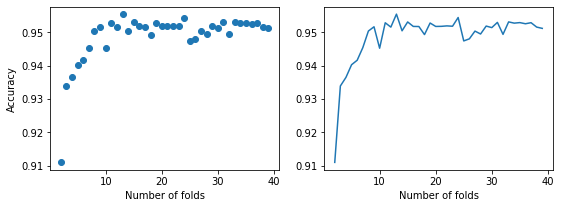

In [ ]:
# XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
df4=data
# split into input (X) and output (y) variables
X = df4.loc[:,df4.columns !='Q18a']
y = df4['Q18a']

# evaluate the model
model = XGBClassifier()
empty=[]
for i in range(2,40):
    cv = RepeatedStratifiedKFold(n_splits=i, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print('Accuracy: %.3f (%.3f) \n' % (mean(n_scores), std(n_scores)))
    # fit the model on the whole dataset
    empty.append(mean(n_scores))
    model = XGBClassifier()
    model.fit(X, y)
    names = range(2,40)
values = empty

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.scatter(names, values)
plt.ylabel('Accuracy')
plt.xlabel('Number of folds')
plt.subplot(122)
plt.plot(names, values)
plt.xlabel('Number of folds')
plt.show()


Accuracy: 0.952 (0.031) 

Feature: 0, Score: 0.02665
Feature: 1, Score: 0.05551
Feature: 2, Score: 0.02586
Feature: 3, Score: 0.00559
Feature: 4, Score: 0.02716
Feature: 5, Score: 0.05879
Feature: 6, Score: 0.04480
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.03621
Feature: 9, Score: 0.04321
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.02748
Feature: 12, Score: 0.02490
Feature: 13, Score: 0.03934
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.10650
Feature: 19, Score: 0.17230
Feature: 20, Score: 0.02117
Feature: 21, Score: 0.02582
Feature: 22, Score: 0.03591
Feature: 23, Score: 0.01200
Feature: 24, Score: 0.03457
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.01731
Feature: 28, Score: 0.04847
Feature: 29, Score: 0.02884
Feature: 30, Score: 0.03133
Feature: 31, Score: 0.01519
Feature: 32, Score: 0.03510


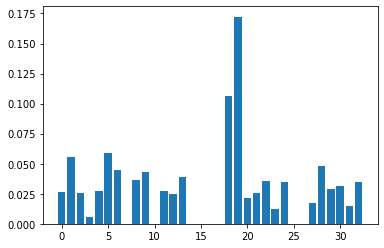

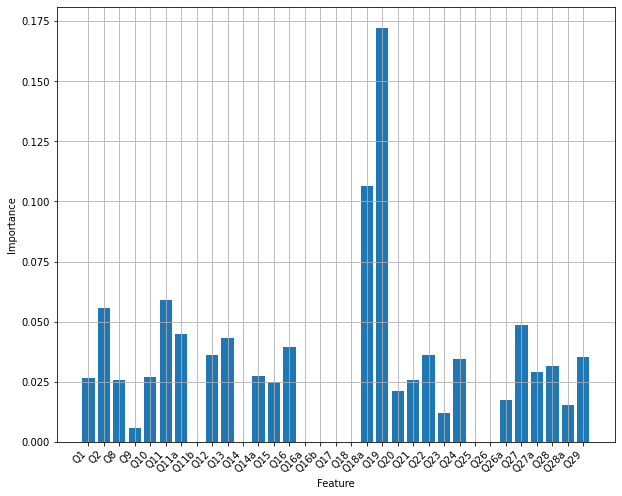

In [ ]:
#XGboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# Weijia comment it due to error message on this line
# data = df4.values
data = df4.values

# split into input (X) and output (y) variables
X = df4.loc[:,df4.columns !='Q18a']
y = df4['Q18a']
# evaluate the model
model = XGBClassifier()
empty=[]

cv = RepeatedStratifiedKFold(n_splits=9, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f) \n' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
empty.append(mean(n_scores))
model = XGBClassifier()
model.fit(X, y)
names = range(2,20)
values = empty

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
import matplotlib.pyplot as plt
   
#C = ['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
#     'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
#      'Q25', 'Q26', 'Q27', 'Q28', 'Q29']

C = ['Q1', 'Q2', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29']
GC = importance
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

In [ ]:
# Install catboost library 
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


Accuracy: 0.910 (0.038)
Accuracy: 0.912 (0.041)
Accuracy: 0.924 (0.047)
Accuracy: 0.921 (0.043)
Accuracy: 0.913 (0.043)
Accuracy: 0.919 (0.036)
Accuracy: 0.916 (0.039)
Accuracy: 0.920 (0.043)
Accuracy: 0.925 (0.043)
Accuracy: 0.919 (0.036)
Accuracy: 0.926 (0.039)
Accuracy: 0.924 (0.037)
Accuracy: 0.925 (0.036)
Accuracy: 0.926 (0.042)
Accuracy: 0.926 (0.039)
Accuracy: 0.925 (0.043)


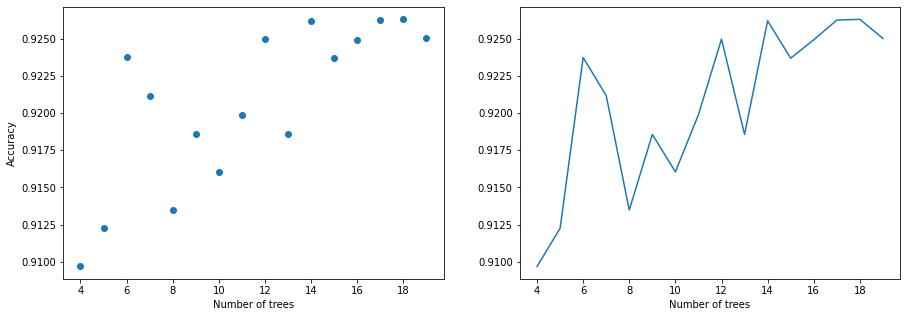

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
X = df4.loc[:,df4.columns !='Q18a']
y = df4['Q18a']
# evaluate the model
empty=[]
for i in range(4,20):
    model = CatBoostClassifier(verbose=0, n_estimators=i)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    # fit the model on the whole dataset
    empty.append(mean(n_scores))
    model = CatBoostClassifier(verbose=0, n_estimators=i)
    model.fit(X, y)
names = range(4,20)
values = empty

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(names, values)
plt.ylabel('Accuracy')
plt.xlabel('Number of trees')
plt.subplot(122)
plt.plot(names, values)
plt.xlabel('Number of trees')
plt.show()

Feature: 0, Score: 2.73070
Feature: 1, Score: 1.78569
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.23813
Feature: 6, Score: 2.86674
Feature: 7, Score: 0.73754
Feature: 8, Score: 1.54298
Feature: 9, Score: 0.46924
Feature: 10, Score: 0.05767
Feature: 11, Score: 2.95836
Feature: 12, Score: 1.78499
Feature: 13, Score: 0.00000
Feature: 14, Score: 1.28474
Feature: 15, Score: 1.43455
Feature: 16, Score: 0.64500
Feature: 17, Score: 0.00000
Feature: 18, Score: 21.89732
Feature: 19, Score: 46.29235
Feature: 20, Score: 1.19222
Feature: 21, Score: 0.09992
Feature: 22, Score: 0.07291
Feature: 23, Score: 1.57600
Feature: 24, Score: 1.32756
Feature: 25, Score: 0.17420
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 4.21833
Feature: 29, Score: 0.53208
Feature: 30, Score: 0.00000
Feature: 31, Score: 3.76867
Feature: 32, Score: 0.31210


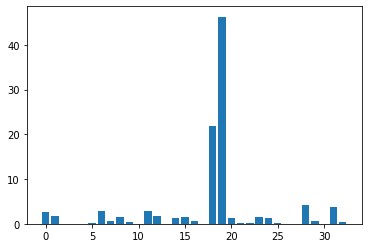

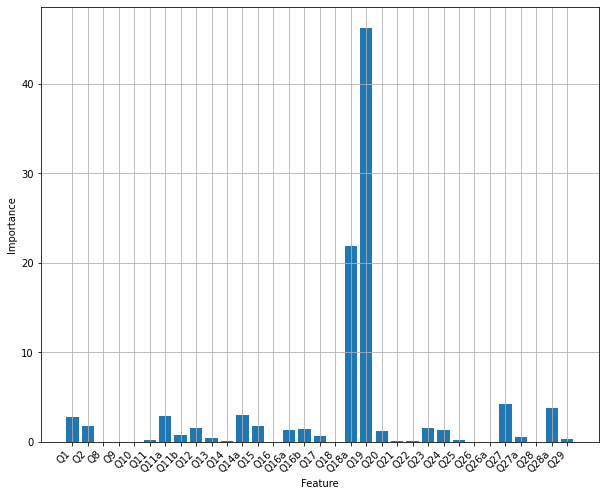

In [ ]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
import matplotlib.pyplot as plt
   
#C = ['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
#       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
#       'Q25', 'Q26', 'Q27', 'Q28', 'Q29']

C = ['Q1', 'Q2', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29']

GC = importance
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

In [ ]:
# Smote

In [ ]:
#SMOTE
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
RF = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0).fit(X_tr, y_tr)
RF.predict(X_test)
round(RF.score(X_test, y_test), 4)

Class=1, n=225 (85.878%)
Class=0, n=37 (14.122%)


0.9396

Feature: 0, Score: 0.06014
Feature: 1, Score: 0.00590
Feature: 2, Score: 0.01517
Feature: 3, Score: 0.02908
Feature: 4, Score: 0.01836
Feature: 5, Score: 0.02557
Feature: 6, Score: 0.02594
Feature: 7, Score: 0.02400
Feature: 8, Score: 0.03474
Feature: 9, Score: 0.03818
Feature: 10, Score: 0.01333
Feature: 11, Score: 0.01581
Feature: 12, Score: 0.06338
Feature: 13, Score: 0.01456
Feature: 14, Score: 0.04815
Feature: 15, Score: 0.01574
Feature: 16, Score: 0.01378
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.06672
Feature: 19, Score: 0.25255
Feature: 20, Score: 0.00777
Feature: 21, Score: 0.00808
Feature: 22, Score: 0.01990
Feature: 23, Score: 0.02895
Feature: 24, Score: 0.01784
Feature: 25, Score: 0.00525
Feature: 26, Score: 0.02515
Feature: 27, Score: 0.01482
Feature: 28, Score: 0.01588
Feature: 29, Score: 0.01427
Feature: 30, Score: 0.03474
Feature: 31, Score: 0.00861
Feature: 32, Score: 0.01764


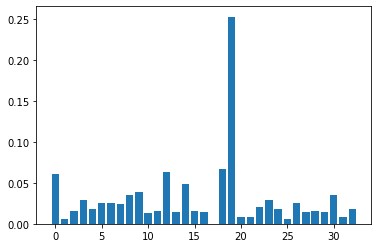

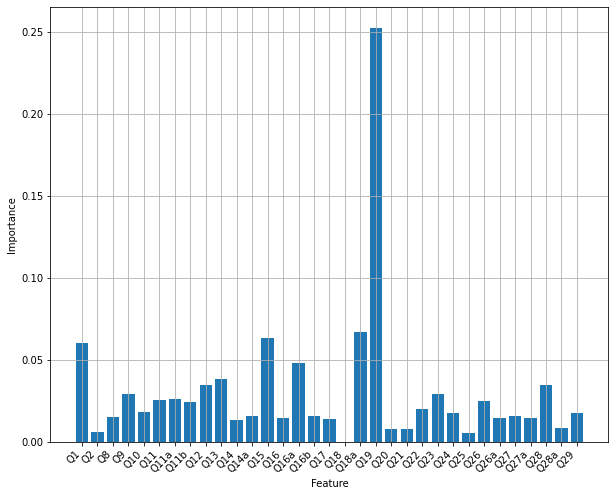

In [ ]:
importance = RF.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
import matplotlib.pyplot as plt   
#C = ['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
#       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
#       'Q25', 'Q26', 'Q27', 'Q28', 'Q29']
C = ['Q1', 'Q2', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29']
GC = importance
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

Accuracy: 0.943 (0.031)


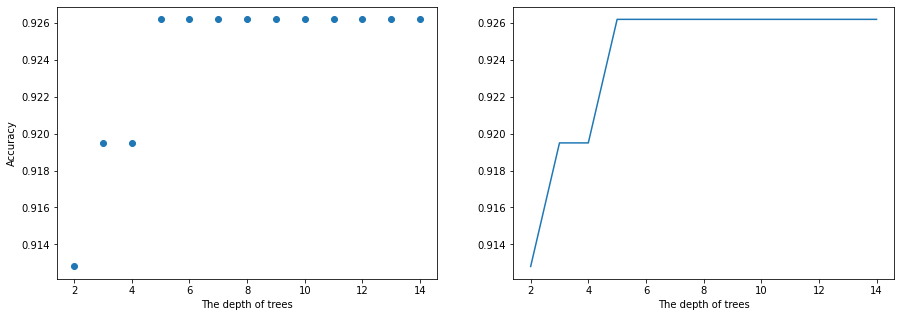

In [ ]:
#LightGBM
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
Empty=[]
for i in range(2,15):
    model = LGBMClassifier(n_estimators=20, max_depth=i, num_leaves=2**i)
    Light = model.fit(X_tr, y_tr)
    Light.predict(X_test)
    round(Light.score(X_test, y_test), 4)
    Empty.append(round(Light.score(X_test, y_test), 4))
Empty    
names = range(2,15)
values = Empty
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(names, values)
plt.ylabel('Accuracy')
plt.xlabel('The depth of trees')
plt.subplot(122)
plt.plot(names, values)
plt.xlabel('The depth of trees')
plt.show()

Feature: 0, Score: 14.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 13.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 3.00000
Feature: 5, Score: 3.00000
Feature: 6, Score: 5.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 8.00000
Feature: 9, Score: 3.00000
Feature: 10, Score: 6.00000
Feature: 11, Score: 2.00000
Feature: 12, Score: 17.00000
Feature: 13, Score: 3.00000
Feature: 14, Score: 8.00000
Feature: 15, Score: 1.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 36.00000
Feature: 19, Score: 49.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 2.00000
Feature: 23, Score: 1.00000
Feature: 24, Score: 1.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 2.00000
Feature: 27, Score: 11.00000
Feature: 28, Score: 8.00000
Feature: 29, Score: 3.00000
Feature: 30, Score: 3.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000


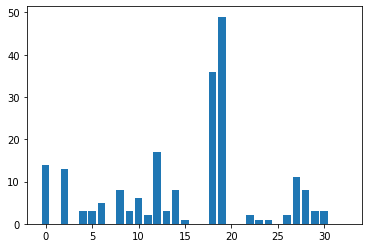

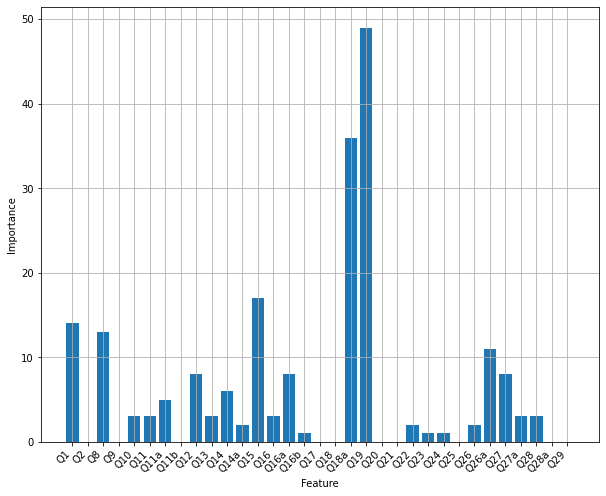

In [ ]:
importance = Light.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
import matplotlib.pyplot as plt
   
#C= ['Q1', 'Q2', 'Q3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
#       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
#       'Q25', 'Q26', 'Q27', 'Q28', 'Q29']

C = ['Q1', 'Q2', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11a', 'Q11b', 'Q12', 'Q13',
       'Q14', 'Q14a', 'Q15', 'Q16', 'Q16a', 'Q16b', 'Q17', 'Q18', 'Q18a',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q26a', 'Q27',
       'Q27a', 'Q28', 'Q28a', 'Q29']

GC = importance
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()